# ***ASSIGNMENT_12_NAIVE_BAYES_SALARY_DATA***

1) ***Prepare a classification model using Naive Bayes ***
***for salary data*** 

# ***Data Description:***

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual 







In [3]:
# IMPORT THE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# IMPORT THE SALARY TRAIN DATASET
data_train = pd.read_csv("/content/SalaryData_Train.csv")
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Dropping educationno column as it is not given in problem statement 
data_train2 = data_train.drop(columns="educationno")
data_train2

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# checking number of rows and columns
data_train2.shape

(30161, 13)

In [7]:
# Import the salary Test data set
data_test = pd.read_csv("/content/SalaryData_Test.csv")
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [8]:
#Dropping educationno column as it is not given in problem statement 
data_test2=data_test.drop(columns="educationno")
data_test2

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [9]:
 data_test2.shape

(15060, 13)

In [10]:
# combining both the train and test dataset for Naive bayes classifier 
data=pd.merge(data_train2,data_test2)
data

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
1,19,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
2,19,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
3,19,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,19,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,61,Private,7th-8th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
5906,45,Self-emp-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
5907,32,Private,Some-college,Never-married,Exec-managerial,Own-child,White,Male,0,0,40,United-States,<=50K
5908,33,Private,HS-grad,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [11]:
# display number of rows and columns
data.shape

(5910, 13)

In [12]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5910 entries, 0 to 5909
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5910 non-null   int64 
 1   workclass      5910 non-null   object
 2   education      5910 non-null   object
 3   maritalstatus  5910 non-null   object
 4   occupation     5910 non-null   object
 5   relationship   5910 non-null   object
 6   race           5910 non-null   object
 7   sex            5910 non-null   object
 8   capitalgain    5910 non-null   int64 
 9   capitalloss    5910 non-null   int64 
 10  hoursperweek   5910 non-null   int64 
 11  native         5910 non-null   object
 12  Salary         5910 non-null   object
dtypes: int64(4), object(9)
memory usage: 646.4+ KB


In [13]:
# Descriptive Statistics
data.describe()

,age,capitalgain,capitalloss,hoursperweek
count,5910.000000,5910.000000,5910.000000,5910.000000
mean,32.815059,49.204738,2.436548,38.545516
std,10.892922,1433.023789,71.195428,7.456800
min,17.000000,0.000000,0.000000,8.000000
25%,23.000000,0.000000,0.000000,40.000000
50%,32.000000,0.000000,0.000000,40.000000
75%,40.000000,0.000000,0.000000,40.000000
max,67.000000,99999.000000,2415.000000,85.000000


In [14]:
# data types for each column
data.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [15]:
# chhecking null values
data.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
# Plot for relation between salary and other features 
def count_plot(data, columns):
  plt.figure(figsize=(15,10))
  for indx,var in enumerate(columns):
    plt.subplot(5,3, indx+1)
    g=sns.countplot(data[var],hue=data['Salary'])
  plt.tight_layout()
features=data.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

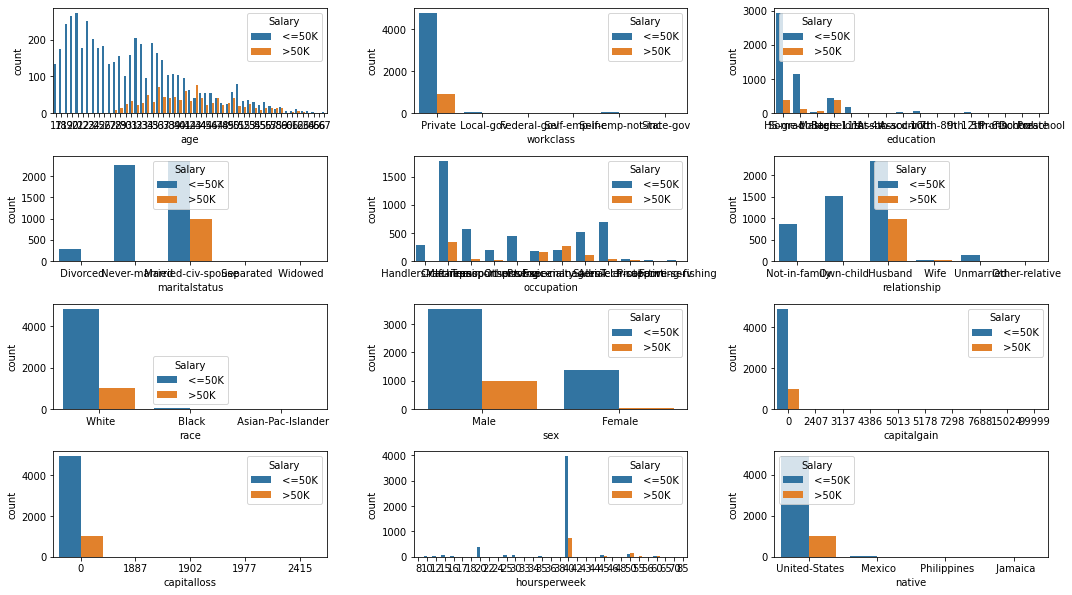

In [17]:
#With the help of count plot we visualize the feature variables with target variable 
count_plot(data,features)

In [18]:
#Importing the necessary Libraries for encoding, splitting data and Gaussian Naive Bayes
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB

In [19]:
#Using Ordinal encoder for Independent features and Label encoder for target feature 
encoder=OrdinalEncoder()
data_encoded=encoder.fit_transform(data[features])
data_encoded=pd.DataFrame(data_encoded,columns=features)
data_encoded

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,21.0,2.0,11.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0
1,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
2,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
3,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
4,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5905,44.0,2.0,5.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
5906,28.0,3.0,9.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,21.0,3.0
5907,15.0,2.0,15.0,2.0,2.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0
5908,16.0,2.0,11.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,17.0,3.0


In [20]:
encoder1=LabelEncoder()
data_encoded1=encoder1.fit_transform(data['Salary'])
data_encoded1

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
data_encoded['Salary']=data_encoded1
data_encoded

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,21.0,2.0,11.0,0.0,4.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0,0
1,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
2,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
3,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
4,2.0,2.0,11.0,2.0,1.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,44.0,2.0,5.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0,0
5906,28.0,3.0,9.0,1.0,2.0,0.0,2.0,1.0,0.0,0.0,21.0,3.0,1
5907,15.0,2.0,15.0,2.0,2.0,3.0,2.0,1.0,0.0,0.0,17.0,3.0,0
5908,16.0,2.0,11.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,17.0,3.0,0


In [22]:
data_encoded.shape

(5910, 13)

In [25]:
# Splitting the data 
x=data_encoded.iloc[:,0:-1]
y=data_encoded['Salary']

In [26]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=44)


In [27]:
x_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
5326,1.0,2.0,1.0,2.0,4.0,3.0,2.0,1.0,0.0,0.0,7.0,3.0
4478,23.0,2.0,11.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
1386,1.0,2.0,1.0,2.0,6.0,3.0,2.0,1.0,0.0,0.0,7.0,3.0
460,0.0,2.0,1.0,2.0,9.0,3.0,2.0,1.0,0.0,0.0,7.0,3.0
976,9.0,2.0,11.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,17.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1579,12.0,2.0,11.0,2.0,4.0,1.0,2.0,1.0,0.0,0.0,17.0,3.0
1885,8.0,2.0,15.0,2.0,0.0,3.0,2.0,0.0,0.0,0.0,17.0,3.0
3339,26.0,2.0,11.0,1.0,1.0,0.0,2.0,1.0,0.0,0.0,17.0,3.0
2091,1.0,2.0,1.0,2.0,6.0,3.0,2.0,0.0,0.0,0.0,7.0,3.0


In [28]:
model=GaussianNB()
model.fit(x_train,y_train)
y_pred_gnb =model.predict(x_test)


In [29]:
y_pred_gnb

array([0, 1, 0, ..., 1, 0, 1])

In [30]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gnb)))

Model accuracy score: 0.6170


In [31]:
# checking for overfitting of model
y_pred_train = model.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6452


In [32]:
#Displaying Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gnb)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[825 670]
 [  9 269]]

True Positives(TP) =  825

True Negatives(TN) =  269

False Positives(FP) =  670

False Negatives(FN) =  9


In [33]:
# For research purpose comparing with Multinomial Naive Bayes 
from sklearn.naive_bayes import MultinomialNB

In [34]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [35]:
y_pred_mb=mnb.predict(x_test)
y_pred_mb

array([0, 1, 0, ..., 1, 0, 0])

In [36]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_mb)))


Model accuracy score: 0.7569


## ***Hence we oberserved in our case the Multinomial Naive Bayes is more accurate than Gaussian.***